In [1]:
#this function use for remove the outliers
# read the csv

import pandas as pd
import numpy as np 

df = pd.read_csv("bhp.csv")
df.head(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
# we finding outliers in price_per_sqft column
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

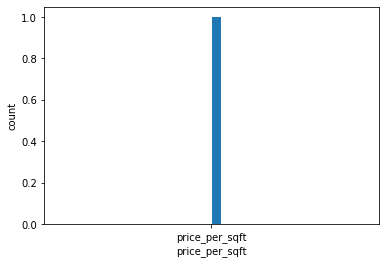

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist('price_per_sqft', bins = 30, rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.show()

In [5]:
# we find outliers using z-score formula to find z-score = (value - mean)/standard deviation

df['z_score'] = (df.price_per_sqft - df.price_per_sqft.mean()) / df.price_per_sqft.std()
df.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697


In [6]:
# we are using 3 stamdard deviation
df[df['z_score']>3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


In [7]:
#remove outliers from your dataset

df = df[(df.z_score>-3)&(df.z_score<3)]
df.shape

(13195, 8)